In [136]:
import pandas as pd
import numpy as np

In [137]:
df = pd.read_csv('Admission_Predict_Ver1.1.csv')

In [138]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [139]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [140]:
df.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [141]:
df.drop(columns = 'Serial No.',axis = 1)

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1,0.87
496,337,117,5,5.0,5.0,9.87,1,0.96
497,330,120,5,4.5,5.0,9.56,1,0.93
498,312,103,4,4.0,5.0,8.43,0,0.73


In [142]:
print(df.columns)

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')


In [143]:
x = df.drop('Chance of Admit ', axis = 1)

In [144]:
y = df['Chance of Admit ']

In [145]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=1)

In [146]:
x_train

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
238,239,310,104,3,2.0,3.5,8.37,0
438,439,318,110,1,2.5,3.5,8.54,1
475,476,300,101,3,3.5,2.5,7.88,0
58,59,300,99,1,3.0,2.0,6.80,1
380,381,322,104,3,3.5,4.0,8.84,1
...,...,...,...,...,...,...,...,...
255,256,307,110,4,4.0,4.5,8.37,0
72,73,321,111,5,5.0,5.0,9.45,1
396,397,325,107,3,3.0,3.5,9.11,1
235,236,326,111,5,4.5,4.0,9.23,1


In [147]:
y_train

238    0.70
438    0.67
475    0.59
58     0.36
380    0.78
       ... 
255    0.79
72     0.93
396    0.84
235    0.88
37     0.58
Name: Chance of Admit , Length: 400, dtype: float64

In [148]:
from sklearn.preprocessing import MinMaxScaler

In [149]:
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [150]:
x_train

array([[0.47695391, 0.4       , 0.42857143, ..., 0.57142857, 0.50320513,
        0.        ],
       [0.87775551, 0.56      , 0.64285714, ..., 0.57142857, 0.55769231,
        1.        ],
       [0.95190381, 0.2       , 0.32142857, ..., 0.28571429, 0.34615385,
        0.        ],
       ...,
       [0.79358717, 0.7       , 0.53571429, ..., 0.57142857, 0.74038462,
        1.        ],
       [0.47094188, 0.72      , 0.67857143, ..., 0.71428571, 0.77884615,
        1.        ],
       [0.0741483 , 0.2       , 0.46428571, ..., 0.14285714, 0.32051282,
        0.        ]])

In [151]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [152]:
#Model Building
model = Sequential()
model.add(Dense(64, input_dim = x_train.shape[1], activation = 'relu'))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(1, activation = 'linear'))

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [153]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,689 (10.50 KB)

 Trainable params: 2,689 (10.50 KB)

 Non-trainable params: 0 (0.00 B)

In [154]:
model.compile(loss = 'mean_squared_error', optimizer = 'adam')

In [155]:
history = model.fit(x_train, y_train, epochs = 100, batch_size = 32, validation_data = (x_test,y_test)) 

Epoch 1/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2310 - val_loss: 0.0242
Epoch 2/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 702us/step - loss: 0.0325 - val_loss: 0.0266
Epoch 3/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 706us/step - loss: 0.0202 - val_loss: 0.0108
Epoch 4/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 852us/step - loss: 0.0113 - val_loss: 0.0069
Epoch 5/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 902us/step - loss: 0.0076 - val_loss: 0.0060
Epoch 6/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 886us/step - loss: 0.0053 - val_loss: 0.0056
Epoch 7/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 898us/step - loss: 0.0057 - val_loss: 0.0053
Epoch 8/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 876us/step - loss: 0.0052 - val_loss: 0.0051
Epoch 9/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 899us/step - loss: 0.0050 - val_loss: 0.0050
Epoch 10/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 958us/step - loss: 0.0049 - val_loss: 0.0050
Epoch 11/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 863us/step - loss: 0.0038 - val_loss: 0.0049
Epoch 12/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 

In [156]:
y_pred = model.predict(x_test)

1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/stepWARNING:tensorflow:5 out of the last 21 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x30cf55620> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


In [184]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,y_pred)

0.003470139563198549

In [186]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.820302440930115

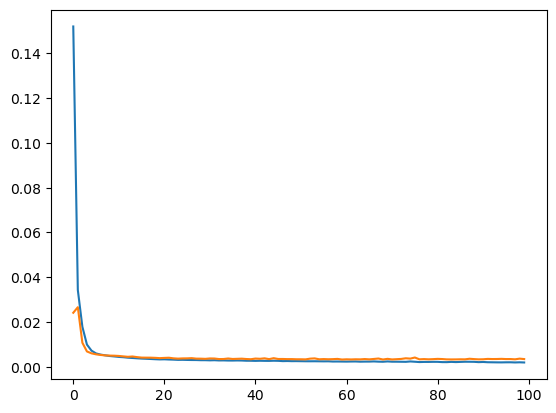

In [188]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])